# Screened infeasibility analysis
Once a parameter screening analysis has been performed and detailed SA/UQ evaluated on the most influential uncertain parameters, this notebook analyses the results using a pre-existing database, created in the `feas_screened_eval.ipynb` notebook. This is capable of running locally, as there are only 3 uncertain parameters.

In [1]:
import easyvvuq as uq
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path

In [2]:
print("Reading in campaign database.")

# Find latest modified database
latest_mod_time = 0.0
for db_path in Path.cwd().glob("campaigns/*/campaign.db"):
    mod_time = db_path.stat().st_mtime
    if mod_time > latest_mod_time:
        latest_mod_time = mod_time
        db_location = str(db_path.resolve())

if latest_mod_time == 0.0:
    raise FileNotFoundError("No database found.")

# /// prefix is required before absolute path
db_location_prefixed = f"sqlite:///{db_location}"
campaign = uq.Campaign(
    db_location=db_location_prefixed, name="example_local", work_dir="campaigns"
)

samples = campaign.get_collation_result()
sample_count = samples.shape[0]
print(f"Campaign read in. Number of samples = {sample_count}")

Reading in campaign database.


FileNotFoundError: No database found.

In [ ]:
# Drop strange multi-index of 0
samples.columns = samples.columns.droplevel(1)
samples

,run_id,iteration,fimp_14,psepbqarmax,pinjalw,fdene,hfact,coreradius,fimp_2,flhthresh,...,ineq_con060,ineq_con062,ineq_con065,ineq_con072,ineq_con079,ineq_con081,ineq_con068,ineq_con031,ineq_con032,rms_vio_constr_res
0,1,0,0.000016,8.769432,51.694318,1.2,1.2,0.75,0.1,1.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008103
1,2,0,0.000016,8.769432,54.300095,1.2,1.2,0.75,0.1,1.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008103
2,3,0,0.000016,8.769432,57.699905,1.2,1.2,0.75,0.1,1.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008103
3,4,0,0.000016,8.769432,60.305682,1.2,1.2,0.75,0.1,1.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008103
4,5,0,0.000016,9.030009,51.694318,1.2,1.2,0.75,0.1,1.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,0,0.000094,9.369991,60.305682,1.2,1.2,0.75,0.1,1.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003206
60,61,0,0.000094,9.630568,51.694318,1.2,1.2,0.75,0.1,1.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003206
61,62,0,0.000094,9.630568,54.300095,1.2,1.2,0.75,0.1,1.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003206
62,63,0,0.000094,9.630568,57.699905,1.2,1.2,0.75,0.1,1.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003206


## Analysis

Check out the QOIs from the samples.

In [ ]:
qois = [
    "norm_objf",
    "eq_con001",
    "eq_con002",
    "eq_con011",
    "ineq_con005",
    "ineq_con008",
    "ineq_con009",
    "ineq_con013",
    "ineq_con015",
    "ineq_con030",
    "ineq_con016",
    "ineq_con024",
    "ineq_con025",
    "ineq_con026",
    "ineq_con027",
    "ineq_con033",
    "ineq_con034",
    "ineq_con035",
    "ineq_con036",
    "ineq_con060",
    "ineq_con062",
    "ineq_con065",
    "ineq_con072",
    "ineq_con079",
    "ineq_con081",
    "ineq_con068",
    "ineq_con031",
    "ineq_con032",
    "rms_vio_constr_res",
]
samples[qois].describe()

,norm_objf,eq_con001,eq_con002,eq_con011,ineq_con005,ineq_con008,ineq_con009,ineq_con013,ineq_con015,ineq_con030,...,ineq_con060,ineq_con062,ineq_con065,ineq_con072,ineq_con079,ineq_con081,ineq_con068,ineq_con031,ineq_con032,rms_vio_constr_res
count,64.000000,64.000000,64.000000,6.400000e+01,64.0,64.0,64.0,64.0,64.0,64.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.000000
mean,-1.319325,-0.001388,-0.029147,-4.611700e-06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005632
std,0.014207,0.001542,0.009881,8.537290e-22,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001877
min,-1.337900,-0.003400,-0.042098,-4.611700e-06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003206
25%,-1.329425,-0.002488,-0.036163,-4.611700e-06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004280
50%,-1.319300,-0.001389,-0.029091,-4.611700e-06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005609
75%,-1.309200,-0.000290,-0.022076,-4.611700e-06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006960
max,-1.300800,0.000625,-0.016309,-4.611700e-06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008103


### Most violated constraints

Find the most violated constraints (by mean).

Plotting violated constraint means.


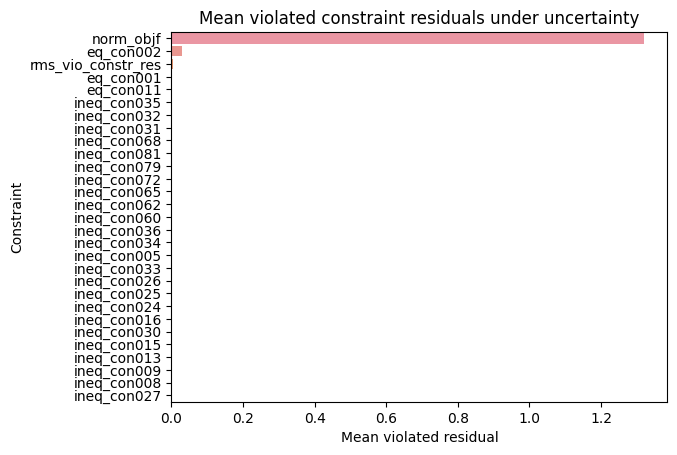

In [ ]:
print("Plotting violated constraint means.")
# Get absolute values of violated constraint residuals
# Abs values before mean: be fair to eq constraints (either side of 0)
vio_means_series = samples[qois].abs().mean().sort_values(ascending=False)
vio_means = pd.DataFrame(vio_means_series, columns=["mean"])
vio_means["variable"] = vio_means.index
vio_means.reset_index(drop=True)

# Exclude objf and vio-constr_res
filter_qois = ["objf", "vio_constr_res"]
constrs_mask = ~vio_means["variable"].isin(filter_qois)
vio_means_filt = vio_means[constrs_mask]

# Plot
fig, ax = plt.subplots()
sns.barplot(data=vio_means_filt, x="mean", y="variable", ax=ax)
ax.set_title("Mean violated constraint residuals under uncertainty")
ax.set_xlabel("Mean violated residual")
ax.set_ylabel("Constraint")
fig.savefig("mean_vio_constr_res.png")

Most violated by frequency. Tricky to set a threshold: probably not the best.

Plotting constraint violation freqencies.


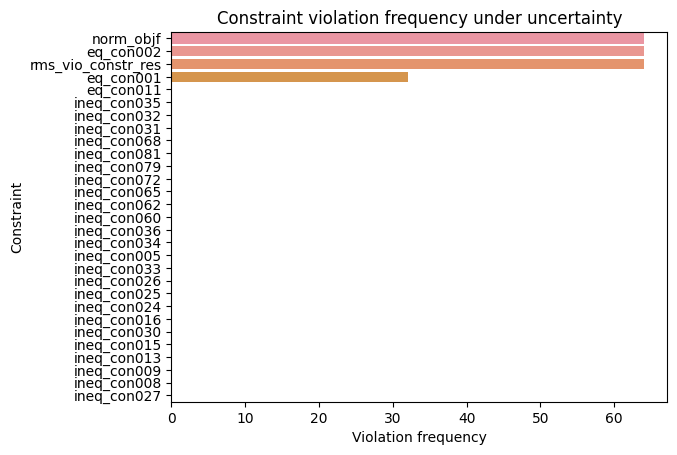

In [ ]:
print("Plotting constraint violation freqencies.")
constr_tol = 1e-3
vio_counts = {}
for qoi in qois:
    # Count rows (samples) where each constraint is violated
    vio_count = samples[samples[qoi].abs() > constr_tol].shape[0]
    vio_counts[qoi] = vio_count

vio_counts
vio_counts_df = pd.DataFrame(data=vio_counts, index=[0])

vio_counts_df_melt = vio_counts_df.melt()
vio_counts_df_melt = vio_counts_df_melt.sort_values(by="value", ascending=False)
vio_counts_df_melt.reset_index(drop=True)
vio_counts_df_melt_filt = vio_counts_df_melt[
    ~vio_counts_df_melt["variable"].isin(filter_qois)
]

# # Plot
fig, ax = plt.subplots()
sns.barplot(data=vio_counts_df_melt_filt, x="value", y="variable", ax=ax)
ax.set_title("Constraint violation frequency under uncertainty")
ax.set_xlabel("Violation frequency")
ax.set_ylabel("Constraint")
fig.savefig("vio_constr_res_freq.png")

### Distribution of violated constraint residuals

Plotting distribution of violated constraint residuals.


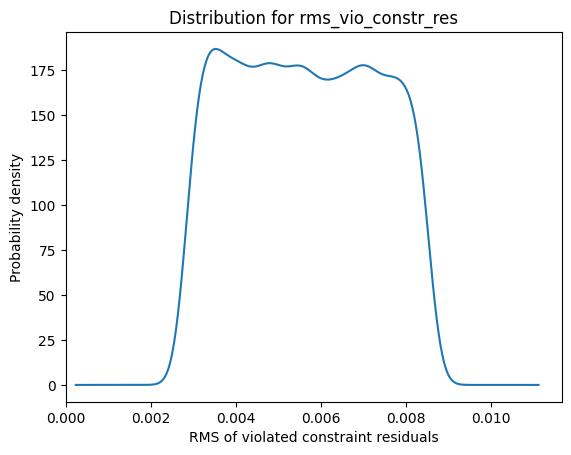

In [ ]:
print("Plotting distribution of violated constraint residuals.")
# Analyse a single output variable, vio_constr_res
results = campaign.analyse(qoi_cols=["rms_vio_constr_res"])

# Get its distribution
dist = results.get_distribution(qoi="rms_vio_constr_res")

# Locations for density function to be evaluated
# (This is taken from easyvvuq's fusion tutorial)
x = np.linspace(dist.lower[0], dist.upper[0], num=500)
pdf = dist.pdf(x)

# Plot
fig, ax = plt.subplots()
sns.lineplot(x=x, y=pdf, markers=True, ax=ax)
ax.set_title("Distribution for rms_vio_constr_res")
ax.set_xlabel("RMS of violated constraint residuals")
ax.set_ylabel("Probability density")
ax.set_xlim([0.0, None])
fig.savefig("vio_constr_res_dist.png")

### Distribution of individual constraint violations

Plotting top 3 violated constraint distributions


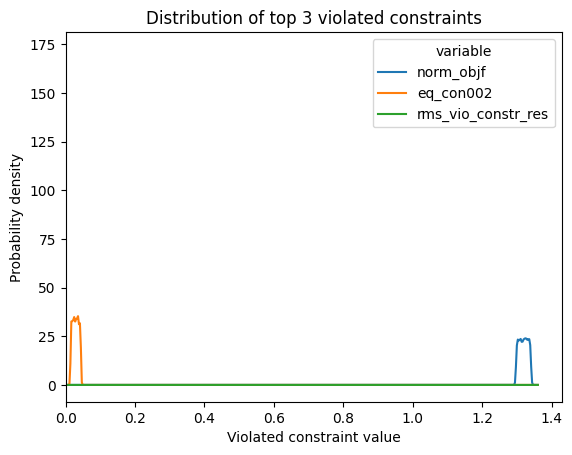

In [ ]:
print("Plotting top 3 violated constraint distributions")
# Take top 3 violated contraints (by mean)
vio_means_filt = vio_means_filt.reset_index(drop=True)
top_vio_means = vio_means_filt[0:3]["variable"].to_list()

# Analyse a single output variable, vio_constr_res
results = campaign.analyse(qoi_cols=top_vio_means)

# Get the distributions
dists = []
dist_lowest = 0.0
dist_highest = 0.0
for qoi in top_vio_means:
    dist = results.get_distribution(qoi=qoi)
    if dist.lower[0] < dist_lowest:
        dist_lowest = dist.lower[0]
    if dist.upper[0] > dist_highest:
        dist_highest = dist.upper[0]
    dists.append(dist)

# Locations for density function to be evaluated
x = np.linspace(dist_lowest, dist_highest, num=500)

# Flip x to make +ve
pdfs = {"x": -x}
for constr_name, dist in zip(top_vio_means, dists):
    pdfs[constr_name] = dist.pdf(x)

top_vio_means_df = pd.DataFrame(pdfs)
top_vio_means_df
top_vio_means_df_melt = top_vio_means_df.melt(id_vars="x", value_vars=top_vio_means)
top_vio_means_df_melt
# Plot
fig, ax = plt.subplots()
sns.lineplot(
    data=top_vio_means_df_melt, x="x", y="value", hue="variable", markers=True, ax=ax
)
ax.set_title("Distribution of top 3 violated constraints")
ax.set_xlabel("Violated constraint value")
ax.set_ylabel("Probability density")
ax.set_xlim([0.0, None])
fig.savefig("top_3_vio_constr_res_dist.png")

### Objective function

Plotting objective function distribution


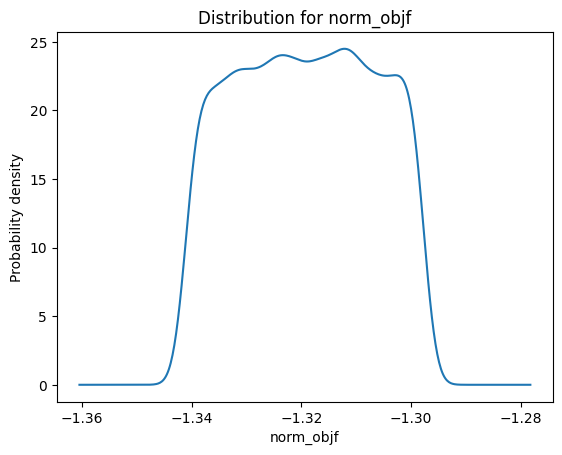

In [ ]:
print("Plotting objective function distribution")
# Analyse a single output variable, vio_constr_res
results = campaign.analyse(qoi_cols=["norm_objf"])

# Get its distribution
dist = results.get_distribution(qoi="norm_objf")

# Locations for density function to be evaluated
x = np.linspace(dist.lower[0], dist.upper[0], num=500)
pdf = dist.pdf(x)

# Plot
fig, ax = plt.subplots()
sns.lineplot(x=x, y=pdf, markers=True, ax=ax)
ax.set_title("Distribution for norm_objf")
ax.set_xlabel("norm_objf")
ax.set_ylabel("Probability density")
fig.savefig("objf_dist.png")

## Sobol indices

### Violated constraint residuals

Sobols for violated constraint residuals.

In [ ]:
print("Plotting Sobols for violated constraint residuals.")
results = campaign.analyse(qoi_cols=["rms_vio_constr_res"])
results.sobols_total()

# First order Sobols
# fimp_14 1
# psepbqarmax 0
# pinjalw 0

# fig, ax = plt.subplots()
# results.plot_sobols_treemap("rms_vio_constr_res", figsize=(10, 10), ax=ax)
# fig.savefig("vio_constr_res_sobols_treemap.png")

# Can give ZeroDivisionError: float division by zero when a factor has 0 Sobol index

Plotting Sobols for violated constraint residuals.


{'rms_vio_constr_res': {'fimp_14': array([1.]),
  'psepbqarmax': array([2.8914882e-22]),
  'pinjalw': array([5.47573374e-23])}}

### Sobols for individual constraint

Interesting for discussion, but not for poster. Too much information (Sobol indices for each constraint).

Plotting individual constraint Sobols
Couldn't plot norm_objf Sobols.
Couldn't plot eq_con002 Sobols.
Couldn't plot rms_vio_constr_res Sobols.


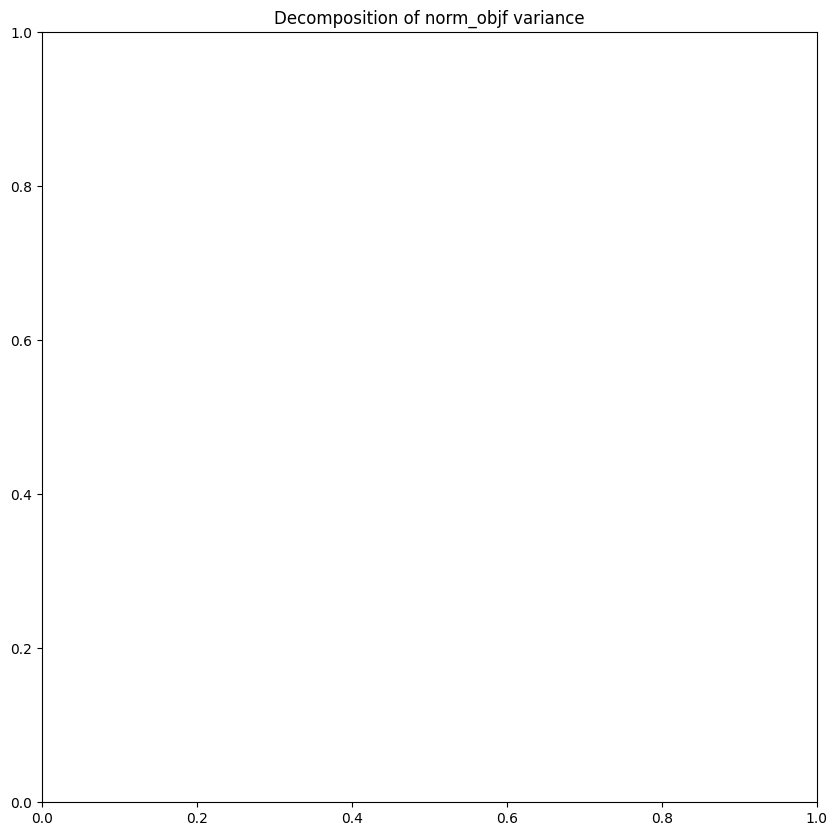

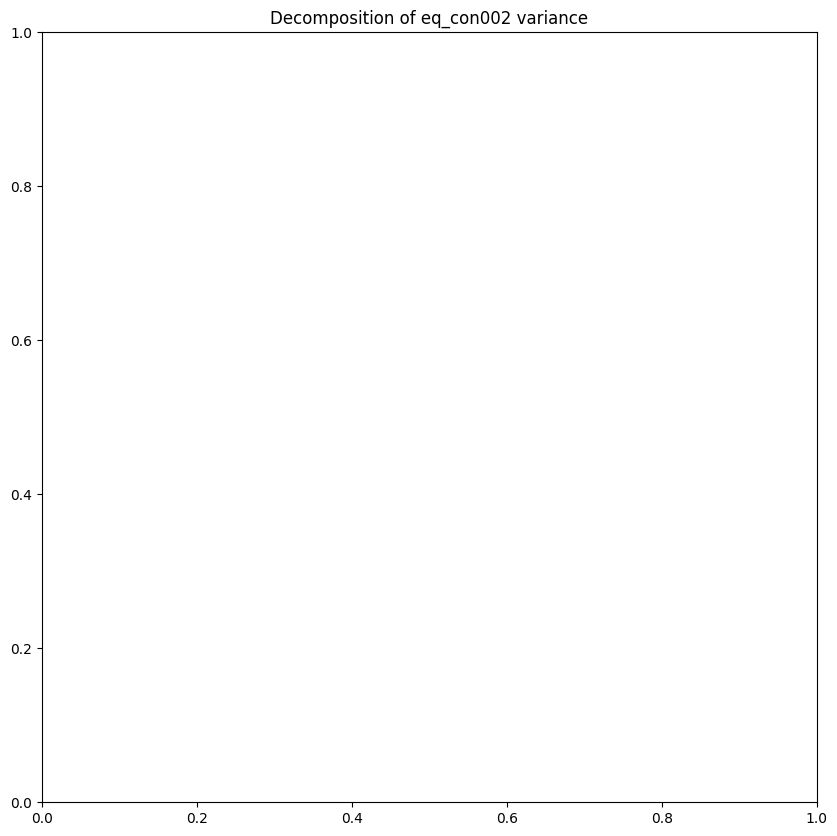

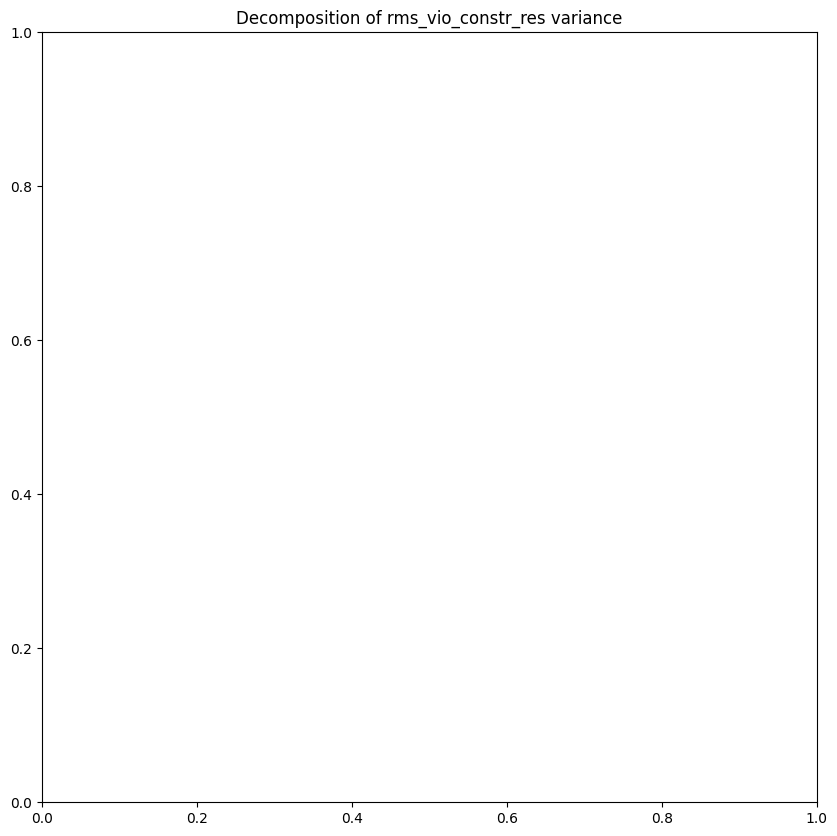

In [ ]:
print("Plotting individual constraint Sobols")
results = campaign.analyse(qoi_cols=top_vio_means)
for constr_name in top_vio_means:
    fig, ax = plt.subplots()
    try:
        results.plot_sobols_treemap(constr_name, ax=ax)
        fig.savefig(f"{constr_name}_sobols_treemap.png")
        print(f"Plotted {constr_name} Sobols.")
    except:
        print(f"Couldn't plot {constr_name} Sobols.")

## Barplot of Sobol indices

Plotting barplot of Sobols for violated constraint residuals.


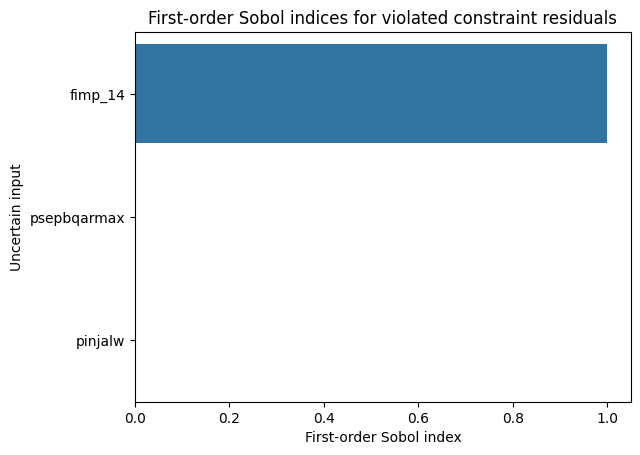

In [ ]:
print("Plotting barplot of Sobols for violated constraint residuals.")
# results.sobols_first()
# results.sobols_second()
# results.sobols_total()

results = campaign.analyse(qoi_cols=["rms_vio_constr_res"])
sobols_first = results.sobols_first()["rms_vio_constr_res"]
sobols_first_df = pd.DataFrame(sobols_first)
sobols_first_df_melted = sobols_first_df.melt()
sobols_first_df_melted

fig, ax = plt.subplots()
sns.barplot(data=sobols_first_df_melted, x="value", y="variable", ax=ax)
ax.set_title("First-order Sobol indices for violated constraint residuals")
ax.set_xlabel("First-order Sobol index")
ax.set_ylabel("Uncertain input")
fig.savefig("fo_sobols_bar.png")

Plotting first and higher-order Sobols for violated constraint residuals.


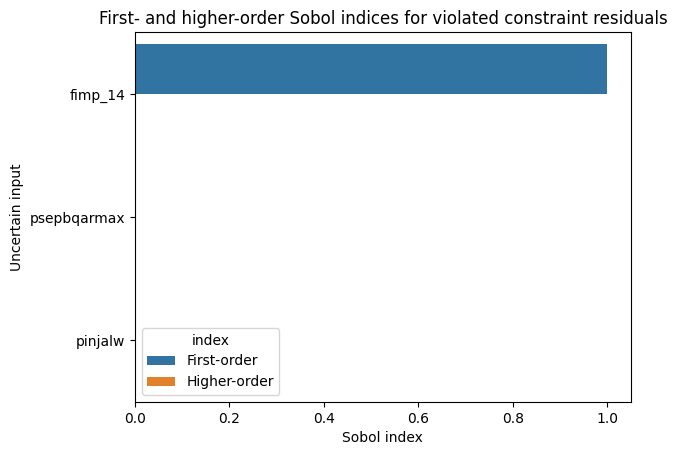

In [ ]:
print("Plotting first and higher-order Sobols for violated constraint residuals.")
sobols_total = results.sobols_total()["rms_vio_constr_res"]

# Calculate higher-order Sobol indices
sobols_higher = {}
for key in sobols_first:
    sobols_higher[key] = sobols_total[key] - sobols_first[key]

# Combine first and higher-order into df
sobols_first_and_higher = {}
for key in sobols_first:
    sobols_first_and_higher[key] = [sobols_first[key][0], sobols_higher[key][0]]

sobols_first_and_higher_df = pd.DataFrame(
    sobols_first_and_higher, index=["First-order", "Higher-order"]
)
sobols_first_and_higher_df = sobols_first_and_higher_df.reset_index()
sobols_first_and_higher_df
sobols_first_and_higher_df_melted = sobols_first_and_higher_df.melt(id_vars="index")
sobols_first_and_higher_df_melted

# Plot
fig, ax = plt.subplots()
ax = sns.barplot(
    data=sobols_first_and_higher_df_melted,
    x="value",
    y="variable",
    hue="index",
    orient="h",
)
ax.set_title("First- and higher-order Sobol indices for violated constraint residuals")
ax.set_xlabel("Sobol index")
ax.set_ylabel("Uncertain input")
fig.savefig("fo_ho_sobols_bar.png")